In [130]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [131]:
# Cargar datos
path_datos = os.path.join('..','..','Datos','Limpios')
df2 = pd.read_csv(os.path.join(path_datos,'datos2_limpios.csv'), index_col=0)

df2_limpio = df2.drop(['Porcentaje Ahorro (%)', 'Ahorro Actual (€)', 'Gasto Mensual (€)',
                        'Vida Esperada (años)', 'Edad de Jubilación'], axis=1)

In [132]:
# Definir variables de entrada y salida
X = df2_limpio.drop(columns=['Años Hasta Jubilación'])
y = df2_limpio['Años Hasta Jubilación']


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
# Modelos a probar
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Red Neuronal': MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500)}

In [135]:
# Evaluación de los modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Cálculo de métricas
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f'----- {name} -----')
    print(f'MAE Entrenamiento: {mae_train:.2f}, MAE Prueba: {mae_test:.2f}')
    print(f'RMSE Entrenamiento: {rmse_train:.2f}, RMSE Prueba: {rmse_test:.2f}')
    print(f'R² Entrenamiento: {r2_train:.2f}, R² Prueba: {r2_test:.2f}')
    print('-' * 30)


----- Random Forest -----
MAE Entrenamiento: 1.12, MAE Prueba: 1.48
RMSE Entrenamiento: 1.35, RMSE Prueba: 1.79
R² Entrenamiento: 0.99, R² Prueba: 0.98
------------------------------
----- Gradient Boosting -----
MAE Entrenamiento: 1.39, MAE Prueba: 1.41
RMSE Entrenamiento: 1.66, RMSE Prueba: 1.69
R² Entrenamiento: 0.98, R² Prueba: 0.98
------------------------------
----- XGBoost -----
MAE Entrenamiento: 1.23, MAE Prueba: 1.45
RMSE Entrenamiento: 1.48, RMSE Prueba: 1.75
R² Entrenamiento: 0.99, R² Prueba: 0.98
------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 2
[LightGBM] [Info] Start training from score 22,275000
----- LightGBM -----
MAE Entrenam

In [136]:
# Validación cruzada
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f'R² promedio en validación cruzada para {name}: {np.mean(scores):.2f}')

R² promedio en validación cruzada para Random Forest: 0.98
R² promedio en validación cruzada para Gradient Boosting: 0.98
R² promedio en validación cruzada para XGBoost: 0.98
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 2
[LightGBM] [Info] Start training from score 22,167500
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000087 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 2
[LightGBM] [Info] Start training from s

In [137]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [120 ,150,180 ],
    'max_depth': [2,4,7],
    'min_samples_split': [7, 10,15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

rf = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_split=10,
                          n_estimators=180, random_state=42)

In [138]:
# Modelos a probar
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=120, min_samples_split=10, max_depth=2 , learning_rate=0.05, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Red Neuronal': MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=500)}

In [139]:
# Evaluación de los modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Cálculo de métricas
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f'----- {name} -----')
    print(f'MAE Entrenamiento: {mae_train:.2f}, MAE Prueba: {mae_test:.2f}')
    print(f'RMSE Entrenamiento: {rmse_train:.2f}, RMSE Prueba: {rmse_test:.2f}')
    print(f'R² Entrenamiento: {r2_train:.2f}, R² Prueba: {r2_test:.2f}')
    print('-' * 30)

----- Random Forest -----
MAE Entrenamiento: 1.12, MAE Prueba: 1.48
RMSE Entrenamiento: 1.35, RMSE Prueba: 1.79
R² Entrenamiento: 0.99, R² Prueba: 0.98
------------------------------
----- Gradient Boosting -----
MAE Entrenamiento: 1.43, MAE Prueba: 1.41
RMSE Entrenamiento: 1.70, RMSE Prueba: 1.69
R² Entrenamiento: 0.98, R² Prueba: 0.98
------------------------------
----- XGBoost -----
MAE Entrenamiento: 1.23, MAE Prueba: 1.45
RMSE Entrenamiento: 1.48, RMSE Prueba: 1.75
R² Entrenamiento: 0.99, R² Prueba: 0.98
------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 2
[LightGBM] [Info] Start training from score 22,275000
----- LightGBM -----
MAE Entrenam

In [140]:
# Cargar nuevo dataset
df = pd.read_csv(os.path.join(path_datos, 'datos1_limpios.csv'), index_col=0)

In [141]:
X_2 = df.drop(['ID', 'FECHA NAC', 'SEXO', 'FECHA ENTRADA', 'PARA CONTAR MESES'], axis=1)

In [142]:
X_2.columns = ['Ingreso Anual (€)','Edad']
X_2 = X_2[['Edad','Ingreso Anual (€)']] 
X_2

,Edad,Ingreso Anual (€)
0,51,15319.07
1,30,19168.80
2,52,18719.86
3,50,12942.60
4,49,20158.08
...,...,...
95,50,25222.69
96,34,18759.95
97,26,22175.25
98,36,25972.71


In [143]:
model_rf = models['Random Forest']

In [144]:
y_pred = model_rf.predict(X_test)
y_pred


array([35.59299305,  3.0028848 , 21.40324514, 32.50704032, 43.89722629,
       19.77363989, 14.92920877, 32.32382711, 33.57708009, 14.50343557,
       32.57349895, 38.9065146 ,  4.44773808, 15.68255578, 29.40488577,
       38.37355962, 13.41443881, 17.78308607, 39.5411492 , 39.1223674 ,
       42.98890495, 39.5411492 , 13.74418199,  4.86648249, 27.23501282,
        7.13440847, 10.56741347, 33.72690317, 25.99314419, 26.57162849,
       18.26200402, 41.02129072, 33.2757526 , 26.4591846 , 27.50840027,
       34.00351577, 12.62965213, 40.07940977, 24.55655237,  7.87163488,
       26.19113996, 10.87547802,  4.88408436, 23.97244423, 27.10848155,
        8.16899158, 20.38084123, 28.79636997, 22.61835394,  5.95853771,
       17.43151956,  1.5046278 , 32.15570932, 12.86287162,  7.55744106,
       43.07836895, 16.78286433,  4.1207264 ,  6.92839284, 35.89198571,
        3.14190072, 26.04084644, 23.78616084, 34.00351577, 24.55655237,
       40.69640672, 28.78811303,  0.43862708, 26.68948589, 12.31

In [145]:
y_test.shape

(1000,)

In [146]:
y_pred.shape

(1000,)

In [147]:
y_test = pd.DataFrame(y_test)
y_test['PRED'] = y_pred
y_test['Error'] = y_test['Años Hasta Jubilación']-y_test['PRED']
y_test


,Años Hasta Jubilación,PRED,Error
1501,36,35.592993,0.407007
2586,1,3.002885,-2.002885
2653,20,21.403245,-1.403245
1055,32,32.507040,-0.507040
705,46,43.897226,2.102774
...,...,...,...
4711,18,18.869738,-0.869738
2313,30,29.356077,0.643923
3214,3,3.666423,-0.666423
2732,16,18.537023,-2.537023


In [148]:
predicciones = model_rf.predict(X_2)
predicciones

array([14.05549181, 34.43324211, 11.18389524, 14.17479553, 15.65358404,
       25.67418915, 33.05646462, 16.31122764, 10.2743908 , 20.98165275,
       39.70176744, 10.0923059 , 21.94162438, 18.94120883, 22.54519728,
       26.75904528, 31.45501519, 39.62927447, 36.38587557, 28.30677622,
       21.13844144, 14.79148467, 18.14601991, 29.85511145, 15.6681512 ,
       37.08736629, 28.79636997, 17.72915127, 29.90521573, 32.32382711,
       16.55971634, 34.8079504 , 22.61835394, 36.72141673, 26.52209997,
       29.62254749, 24.39918369, 37.80362847, 28.13140688, 28.35974764,
       34.16222194, 27.39953012, 32.32382711, 27.42088261, 23.2395166 ,
       18.56786664, 11.89327499, 10.7110199 , 34.58565317, 36.02662083,
       34.45273171, 29.2710772 , 31.09363422, 30.88851892, 37.61391324,
       36.25862244, 18.21292141, 38.30128967, 27.6347275 , 14.55551776,
       14.49279553, 19.45289779, 38.35708984, 37.05384432, 24.52062018,
       30.02075907, 14.66045938, 39.0474803 , 37.08971699,  9.40

In [149]:
df['AÑOS HASTA JUBILACION'] = predicciones
df['EDAD DE JUBILACION'] = df['EDAD'] + df['AÑOS HASTA JUBILACION']

df.head()

,ID,FECHA NAC,SEXO,NOMINA BRUTA 01/01/2025,FECHA ENTRADA,PARA CONTAR MESES,EDAD,AÑOS HASTA JUBILACION,EDAD DE JUBILACION
0,1,1974-03-22,H,15319.07,2002-05-01,2002-05-01,51,14.055492,65.055492
1,2,1995-06-21,M,19168.80,2018-04-13,2018-05-01,30,34.433242,64.433242
2,3,1973-06-07,H,18719.86,2002-04-01,2002-04-01,52,11.183895,63.183895
3,4,1975-07-03,M,12942.60,2002-04-01,2002-04-01,50,14.174796,64.174796
4,5,1976-07-19,M,20158.08,2003-04-01,2003-04-01,49,15.653584,64.653584


<Axes: >

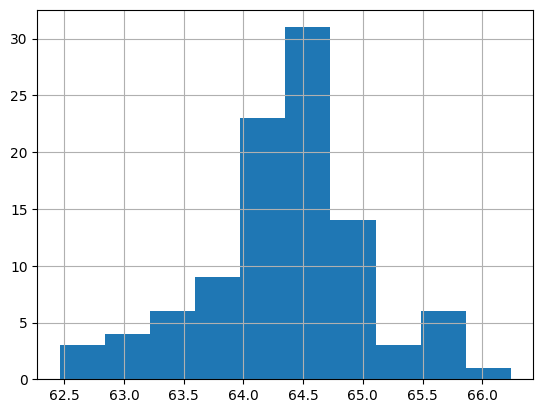

In [150]:
df['EDAD DE JUBILACION'].hist()